I pre-processed this mouse stroke single cell dataset previously by ScanPy.\
Here, I will pre-process it using Seurat, scCustomize and some bioconductor packages.\
I intend to do some in-depth exploratory analysis on the data. In ScanPy analysis,\
I observed some batch effects and performed integration by scvi-tools. I also transferred\
these embeddings to the Seurat object from the anndata object.

I will use some command and analysis approaches from the PART_4A notebook\
such as scater::plotExplanatoryVariables, and scran::modelGeneVar. 

SECOND PART OF PART_4B NOTEBOOK !!!!

In [260]:
rm(plot_list_continuous_vars)

In [261]:
# Now I will write a function to view all plots pairwise with desired discrete variable plot:

plot_discrete_vars_w_ref <- function(seurat_object, discrete_vars, ref_feature, my_reduction, my_colours, my_margin) { 


discrete_vars <- setdiff(discrete_vars, ref_feature)
    
plot_list_discrete_vars <- list()

 plot_REF <- 
        DimPlot(object = seurat_object,
            shuffle = TRUE,
            cols = my_colours,
            reduction = my_reduction, 
            group.by =  ref_feature) + my_margin
    
for (each_feature in discrete_vars) {

 plot_list_discrete_vars[[each_feature]] <- 
        DimPlot(object = seurat_object,
            shuffle = TRUE,
            cols = my_colours,
            reduction = my_reduction, 
            group.by =  each_feature) + my_margin

 plot_list_discrete_vars[[paste0('ref_', ref_feature, '_plot_for_', each_feature)]] <- plot_REF

}
     
    return(plot_list_discrete_vars)
    
}

In [262]:
plot_list_discrete_vars_COMPARED <- plot_discrete_vars_w_ref(seurat_object = zheng_et_al_seurat, 
                                               ref_feature = 'sample',
                                               my_reduction = 'XscVImde_', 
                                               discrete_vars = discrete_vars, 
                                               my_colours = my_colours, 
                                               my_margin = my_margin)

In [263]:
plot_list_discrete_vars_COMPARED |> names()

[1] "orig.ident"                           
 [2] "ref_sample_plot_for_orig.ident"       
 [3] "predicted_doublet"                    
 [4] "ref_sample_plot_for_predicted_doublet"
 [5] "status"                               
 [6] "ref_sample_plot_for_status"           
 [7] "leiden"                               
 [8] "ref_sample_plot_for_leiden"           
 [9] "_scvi_batch"                          
[10] "ref_sample_plot_for__scvi_batch"      
[11] "_scvi_labels"                         
[12] "ref_sample_plot_for__scvi_labels"     
[13] "Phase"                                
[14] "ref_sample_plot_for_Phase"

In [267]:
total_plots <- length(plot_list_discrete_vars_COMPARED)
plot_per_col <- 2

In [268]:
options(repr.plot.width = 9*plot_per_col, repr.plot.height = 7*(total_plots/2))

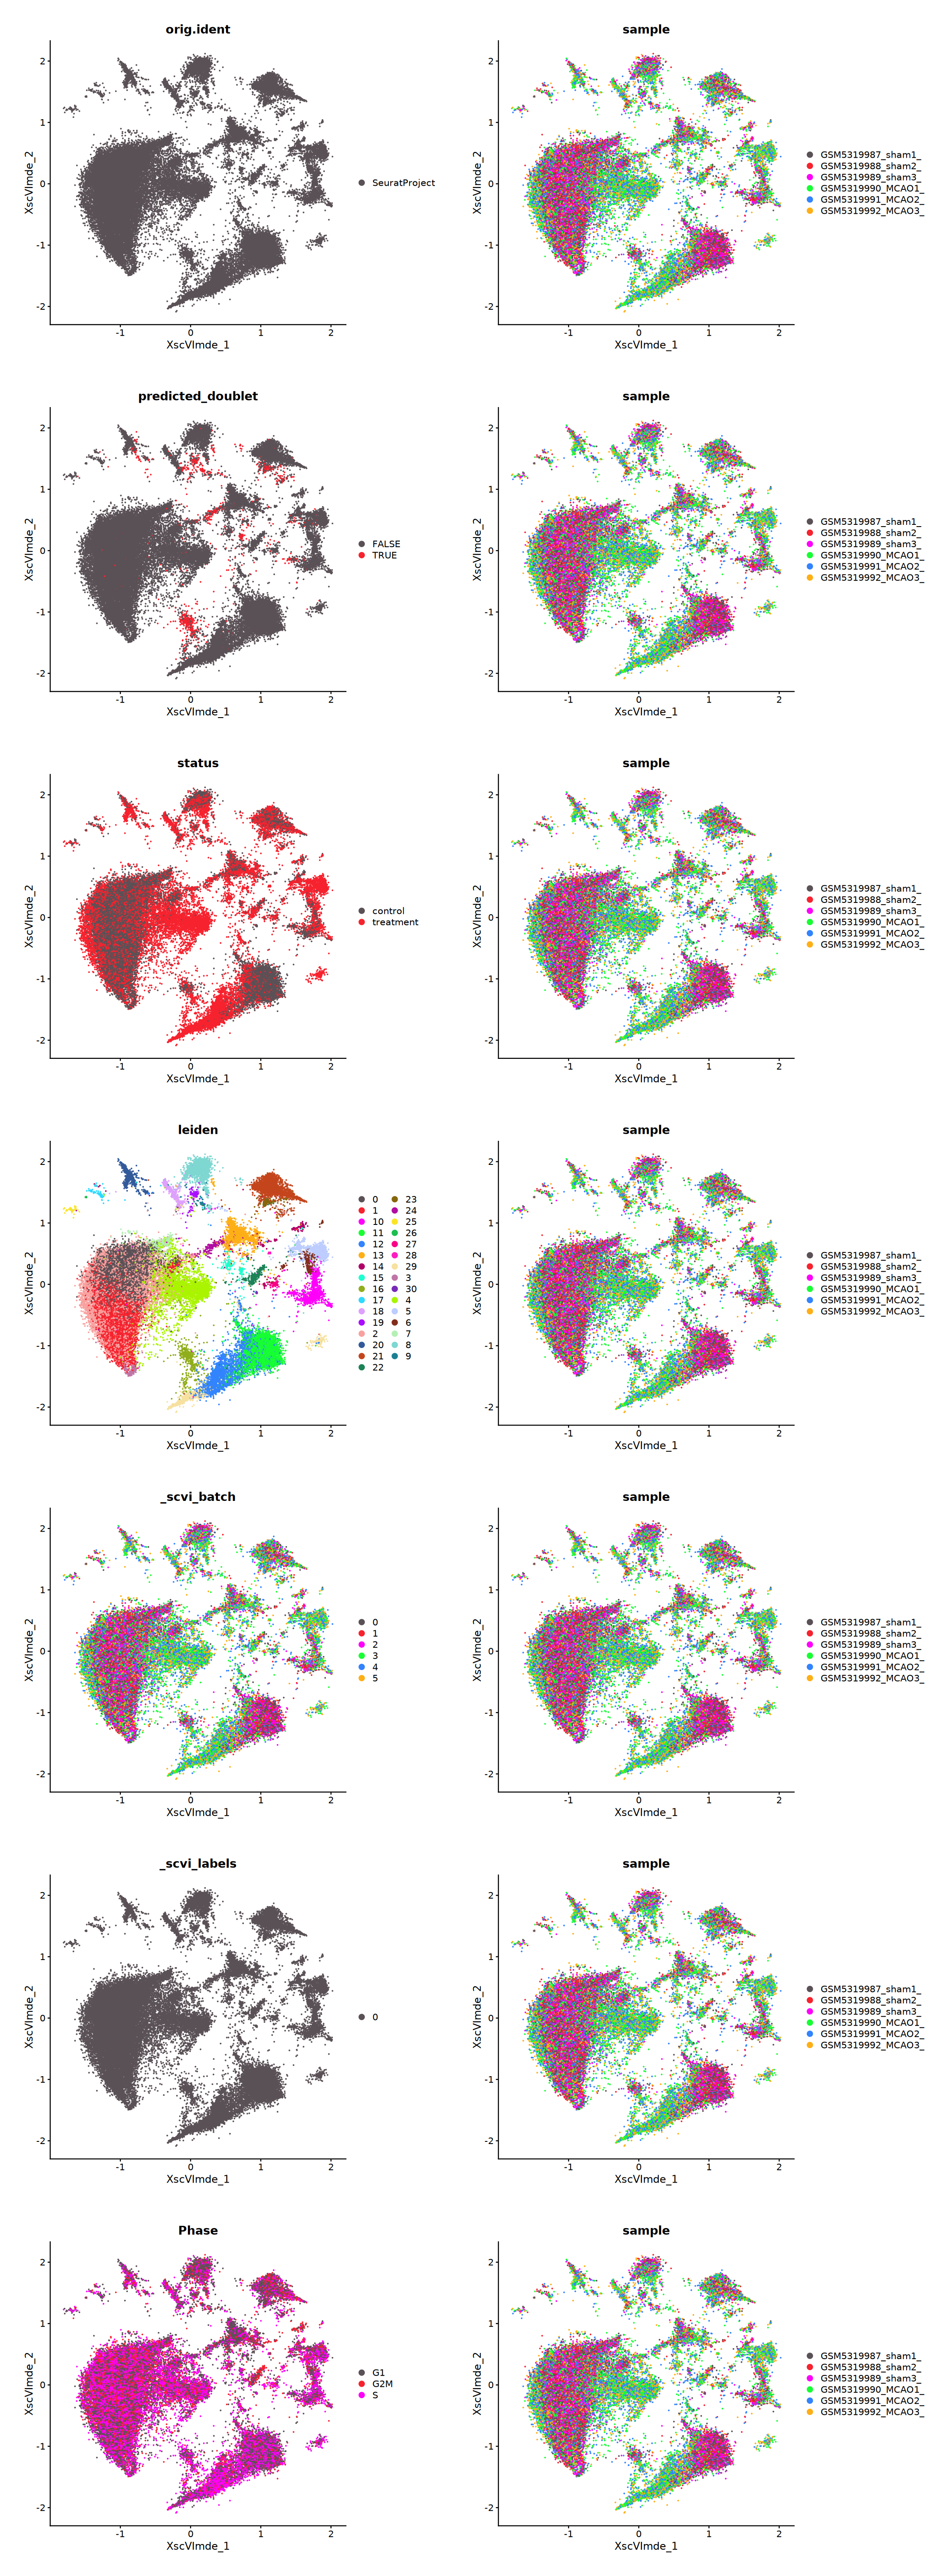

In [269]:
patchwork::wrap_plots(plot_list_discrete_vars_COMPARED, ncol = plot_per_col)

THIS IS THE END OF SECOND PART OF PART_4B NOTEBOOK !!!